# LLama vs. Alpaca CNN

CNN capable of differentiating llamas and alpacas

## 1. Import Packages


In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD,Adam
from keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

## 2. Baseline Model 

In [43]:
def define_model():
    model = Sequential()
    model.add(Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))  # Dropout rate: 25%
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['binary_accuracy'])
    return model

In [58]:
model = define_model()
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 200, 200, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 100, 100, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 100, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │    10,240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,240,481 (39.06 MB)

 Trainable params: 10,240,481 (39.06 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# create data generator
current_dir = os.getcwd()
datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterators
train_it = datagen.flow_from_directory(os.path.join(current_dir, 'dataset/train'),
 class_mode='binary', batch_size=16, target_size=(200, 200), shuffle=True)
datagen = ImageDataGenerator(rescale=1.0/255.0)
test_it = datagen.flow_from_directory(os.path.join(current_dir, 'dataset/test'),
 class_mode='binary', batch_size=16, target_size=(200, 200))

Found 254 images belonging to 2 classes.
Found 117 images belonging to 2 classes.


In [59]:
# fit model
history = model.fit(
    train_it,
    steps_per_epoch=len(train_it),
    epochs=20,
    verbose=2
)

Epoch 1/20
16/16 - 9s - 550ms/step - binary_accuracy: 0.5433 - loss: 1.4610
Epoch 2/20
16/16 - 0s - 875us/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
16/16 - 6s - 377ms/step - binary_accuracy: 0.5433 - loss: 0.8223
Epoch 4/20
16/16 - 0s - 438us/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
16/16 - 6s - 383ms/step - binary_accuracy: 0.5945 - loss: 0.6726
Epoch 6/20
16/16 - 0s - 500us/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
16/16 - 5s - 342ms/step - binary_accuracy: 0.6496 - loss: 0.6612
Epoch 8/20
16/16 - 0s - 500us/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
16/16 - 6s - 355ms/step - binary_accuracy: 0.5906 - loss: 0.6730
Epoch 10/20
16/16 - 0s - 437us/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
16/16 - 6s - 361ms/step - binary_accuracy: 0.6339 - loss: 0.6453
Epoch 12/20
16/16 - 0s - 375us/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/20
16/16 - 6s - 353ms/step -

In [60]:
# Evaluate the model using the test data generator
evaluation = model.evaluate(
    test_it,  # Data generator for test/validation data
    steps=len(test_it),  # Number of steps (batches) to yield from the generator
    verbose=2  # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

8/8 - 1s - 73ms/step - binary_accuracy: 0.6923 - loss: 0.6345
Test Loss: 0.6344788670539856
Test Accuracy: 0.692307710647583


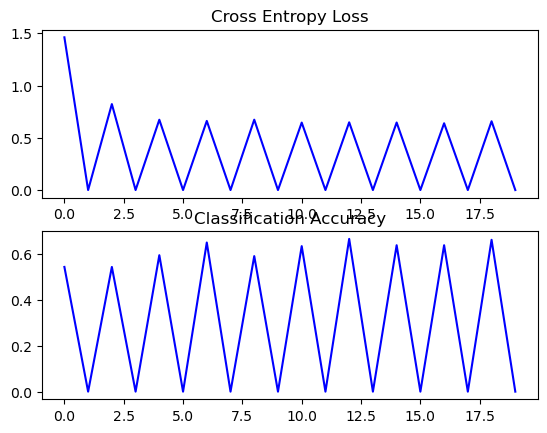

In [61]:
# plot diagnostic learning curves
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.show
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['binary_accuracy'], color='blue', label='train')

In [63]:
from keras.models import load_model

# Save the model
model.save('my_model.h5')
model.save('my_model.keras')